In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
%load_ext autoreload
%autoreload 2

In [3]:
import pandas as pd

In [4]:
df = pd.read_csv('/astro/users/brycek/epyc/users/brycek/Commissioning/aos/ts_phosim/notebooks/analysis_scripts/coord_convert_comcam.csv')

In [5]:
df

,wcsMethod,conversionMethod,raft,sensor,ra,dec,xpix,ypix
0,obs_lsst_flipX,skyToPixel,R22,S00,0.000000,0.000000,6284.500000,6220.500000
1,obs_lsst_flipX,skyToPixel,R22,S00,0.050000,0.050000,7184.500228,7120.500571
2,obs_lsst_flipX,skyToPixel,R22,S00,0.050000,-0.050000,7184.500228,5320.499429
3,obs_lsst_flipX,skyToPixel,R22,S00,-0.050000,0.050000,5384.499772,7120.500571
4,obs_lsst_flipX,skyToPixel,R22,S00,-0.050000,-0.050000,5384.499772,5320.499429
...,...,...,...,...,...,...,...,...
355,sims_coordUtils,pixelToSky,R22,S22,0.234672,0.235349,2048.000000,2000.000000
356,sims_coordUtils,pixelToSky,R22,S22,0.290223,0.177098,1000.000000,1000.000000
357,sims_coordUtils,pixelToSky,R22,S22,0.179101,0.177140,1000.000000,3000.000000
358,sims_coordUtils,pixelToSky,R22,S22,0.290239,0.288220,3000.000000,1000.000000


In [6]:
df.query('conversionMethod=="pixelToSky"')

,wcsMethod,conversionMethod,raft,sensor,ra,dec,xpix,ypix
5,obs_lsst_flipX,pixelToSky,R22,S00,359.764640,-0.234469,2048.0,2000.0
6,obs_lsst_flipX,pixelToSky,R22,S00,359.706419,-0.290021,1000.0,1000.0
7,obs_lsst_flipX,pixelToSky,R22,S00,359.706419,-0.178914,1000.0,3000.0
8,obs_lsst_flipX,pixelToSky,R22,S00,359.817528,-0.290024,3000.0,1000.0
9,obs_lsst_flipX,pixelToSky,R22,S00,359.817528,-0.178915,3000.0,3000.0
...,...,...,...,...,...,...,...,...
355,sims_coordUtils,pixelToSky,R22,S22,0.234672,0.235349,2048.0,2000.0
356,sims_coordUtils,pixelToSky,R22,S22,0.290223,0.177098,1000.0,1000.0
357,sims_coordUtils,pixelToSky,R22,S22,0.179101,0.177140,1000.0,3000.0
358,sims_coordUtils,pixelToSky,R22,S22,0.290239,0.288220,3000.0,1000.0


In [7]:
sensor_list = np.unique(df['sensor'].values)

In [8]:
loc_map = {x: [int(x[1]), int(x[2])] for x in sensor_list}

In [9]:
loc_map

{'S00': [0, 0],
 'S01': [0, 1],
 'S02': [0, 2],
 'S10': [1, 0],
 'S11': [1, 1],
 'S12': [1, 2],
 'S20': [2, 0],
 'S21': [2, 1],
 'S22': [2, 2]}

In [10]:
obs_lsst_x = df.query('conversionMethod=="pixelToSky" and wcsMethod == "obs_lsst_flipX"')
obs_lsst_no_x = df.query('conversionMethod=="pixelToSky" and wcsMethod == "obs_lsst"')
phosim_wcs = df.query('conversionMethod=="pixelToSky" and wcsMethod == "phosim_wcs"')
sims_coordUtils = df.query('conversionMethod == "pixelToSky" and wcsMethod == "sims_coordUtils"')

In [11]:
ccd_plot_colors = ['pink', 'c', 'g', 'gray', 'pink', 'c', 'g', 'gray', 'pink', 'c', 'g', 'gray']

(0, 3)

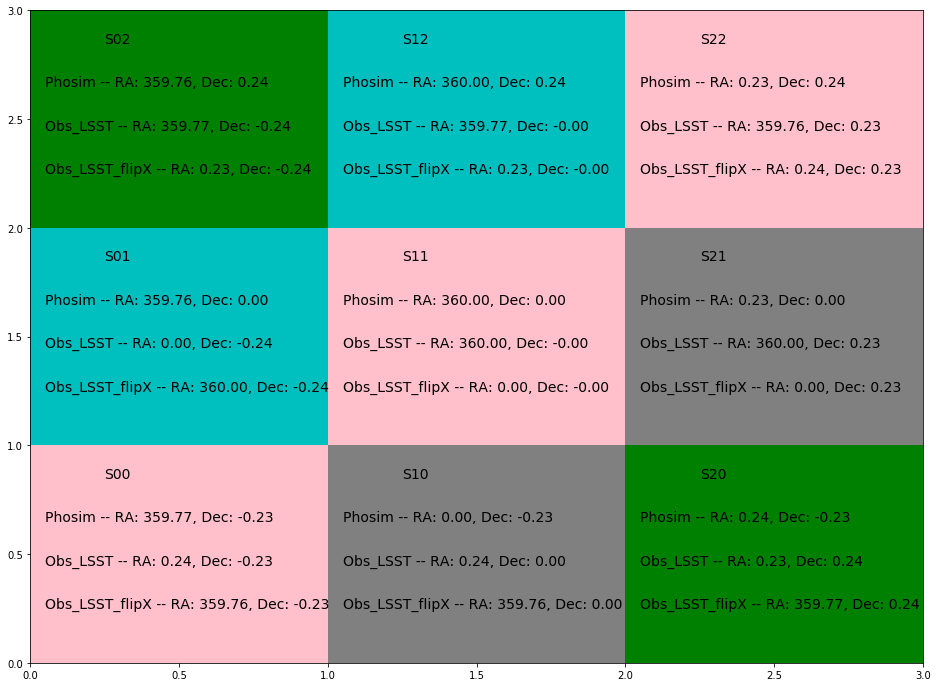

In [12]:
from matplotlib.patches import Rectangle
fig = plt.figure(figsize=(16, 12))
i = 0
for sensor_name in sensor_list:
    sensor_loc = loc_map[sensor_name]
    ax = plt.gca()
    rect = Rectangle(sensor_loc, 1, 1, facecolor=ccd_plot_colors[i])
    ax.add_patch(rect)
    plt.text(sensor_loc[0]+0.05, sensor_loc[1]+0.65, 'Phosim -- RA: %.2f, Dec: %.2f' % (phosim_wcs.query('sensor == "%s"' % sensor_name).ra.values[0],
                                                                                       phosim_wcs.query('sensor == "%s"' % sensor_name).dec.values[0]), fontsize=14)
    plt.text(sensor_loc[0]+0.05, sensor_loc[1]+0.45, 'Obs_LSST -- RA: %.2f, Dec: %.2f' % (obs_lsst_no_x.query('sensor == "%s"' % sensor_name).ra.values[0],
                                                                                          obs_lsst_no_x.query('sensor == "%s"' % sensor_name).dec.values[0]), fontsize=14)
    plt.text(sensor_loc[0]+0.05, sensor_loc[1]+0.25, 'Obs_LSST_flipX -- RA: %.2f, Dec: %.2f' % (obs_lsst_x.query('sensor == "%s"' % sensor_name).ra.values[0],
                                                                                                obs_lsst_x.query('sensor == "%s"' % sensor_name).dec.values[0]), fontsize=14)
    plt.text(sensor_loc[0]+0.25, sensor_loc[1]+0.85, '%s' % sensor_name, fontsize=14)
    i += 1
plt.xlim(0,3)
plt.ylim(0,3)

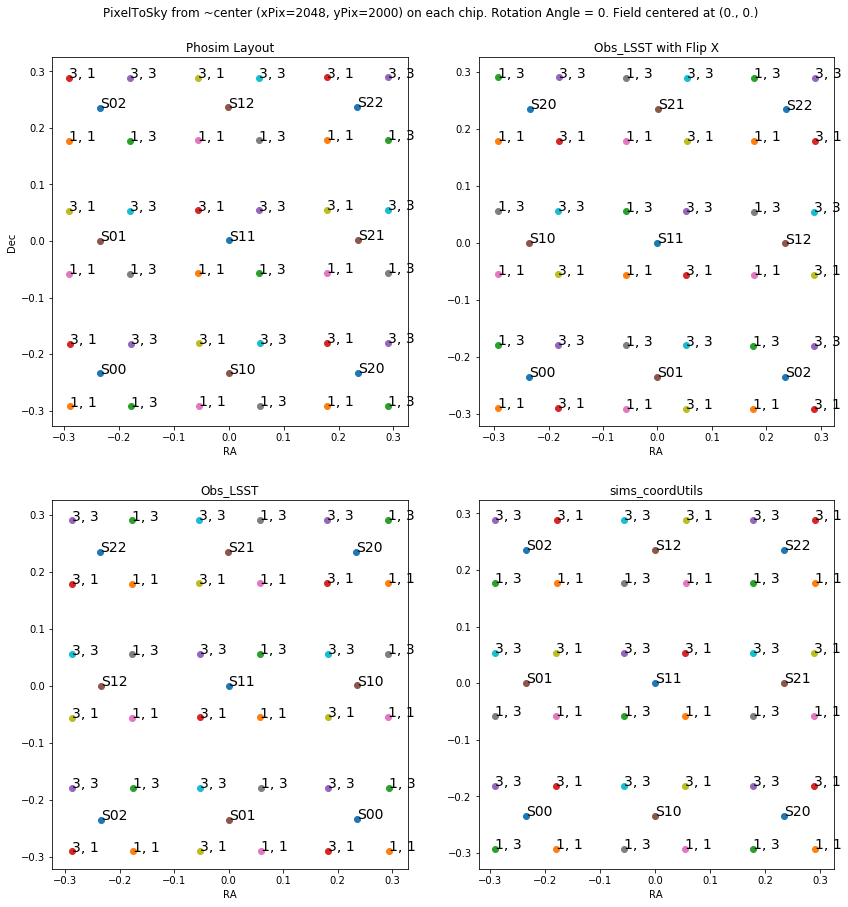

In [13]:
fig = plt.figure(figsize=(14, 14))
fig.add_subplot(2,2,1)
i = 0
for sensor_name in sensor_list:
    sensor_set = False
    sensor_loc = loc_map[sensor_name]
    #ax = plt.gca()
    #rect = Rectangle(sensor_loc, 1, 1, facecolor=ccd_plot_colors[i])
    #ax.add_patch(rect)
    for ra, dec, xpix, ypix in zip(phosim_wcs.query('sensor == "%s"' % sensor_name).ra.values,
                                   phosim_wcs.query('sensor == "%s"' % sensor_name).dec.values,
                                   phosim_wcs.query('sensor == "%s"' % sensor_name).xpix.values,
                                   phosim_wcs.query('sensor == "%s"' % sensor_name).ypix.values):
        if sensor_set is False:
            sensor_string = '%s' % (sensor_name)
            sensor_set = True
        else:
            sensor_string = '%i, %i' % (xpix/1000, ypix/1000)

        if ra > 180:
            plt.scatter(ra - 360, 
                        dec)#, 'Phosim -- %s' % sensor_name, fontsize=14)
            plt.text(ra - 360, 
                     dec, sensor_string, fontsize=14)
        else:
            plt.scatter(ra, 
                        dec)#, 'Phosim -- %s' % sensor_name, fontsize=14)
            plt.text(ra, 
                     dec, sensor_string, fontsize=14)
    i += 1
plt.title('Phosim Layout')
plt.xlabel('RA')
plt.ylabel('Dec')
    
fig.add_subplot(2,2,2)
i = 0
for sensor_name in sensor_list:
    sensor_set = False
    sensor_loc = loc_map[sensor_name]
    #ax = plt.gca()
    #rect = Rectangle(sensor_loc, 1, 1, facecolor=ccd_plot_colors[i])
    #ax.add_patch(rect)
    for ra, dec, xpix, ypix in zip(obs_lsst_x.query('sensor == "%s"' % sensor_name).ra.values,
                                   obs_lsst_x.query('sensor == "%s"' % sensor_name).dec.values,
                                   obs_lsst_x.query('sensor == "%s"' % sensor_name).xpix.values,
                                   obs_lsst_x.query('sensor == "%s"' % sensor_name).ypix.values):
        if sensor_set is False:
            sensor_string = '%s' % (sensor_name)
            sensor_set = True
        else:
            sensor_string = '%i, %i' % (xpix/1000, ypix/1000)

        if ra > 180:
            plt.scatter(ra - 360, 
                        dec)#, 'Phosim -- %s' % sensor_name, fontsize=14)
            plt.text(ra - 360, 
                     dec, sensor_string, fontsize=14)
        else:
            plt.scatter(ra, 
                        dec)#, 'Phosim -- %s' % sensor_name, fontsize=14)
            plt.text(ra, 
                     dec, sensor_string, fontsize=14)
    i += 1
plt.title('Obs_LSST with Flip X')
plt.xlabel('RA')

fig.add_subplot(2,2,3)
i = 0
for sensor_name in sensor_list:
    sensor_set = False
    sensor_loc = loc_map[sensor_name]
    #ax = plt.gca()
    #rect = Rectangle(sensor_loc, 1, 1, facecolor=ccd_plot_colors[i])
    #ax.add_patch(rect)
    for ra, dec, xpix, ypix in zip(obs_lsst_no_x.query('sensor == "%s"' % sensor_name).ra.values,
                                   obs_lsst_no_x.query('sensor == "%s"' % sensor_name).dec.values,
                                   obs_lsst_no_x.query('sensor == "%s"' % sensor_name).xpix.values,
                                   obs_lsst_no_x.query('sensor == "%s"' % sensor_name).ypix.values):
        if sensor_set is False:
            sensor_string = '%s' % (sensor_name)
            sensor_set = True
        else:
            sensor_string = '%i, %i' % (xpix/1000, ypix/1000)

        if ra > 180:
            plt.scatter(ra - 360, 
                        dec)#, 'Phosim -- %s' % sensor_name, fontsize=14)
            plt.text(ra - 360, 
                     dec, sensor_string, fontsize=14)
        else:
            plt.scatter(ra, 
                        dec)#, 'Phosim -- %s' % sensor_name, fontsize=14)
            plt.text(ra, 
                     dec, sensor_string, fontsize=14)
    i += 1
plt.title('Obs_LSST')
plt.xlabel('RA')

fig.add_subplot(2,2,4)
i = 0
for sensor_name in sensor_list:
    sensor_set = False
    sensor_loc = loc_map[sensor_name]
    #ax = plt.gca()
    #rect = Rectangle(sensor_loc, 1, 1, facecolor=ccd_plot_colors[i])
    #ax.add_patch(rect)
    for ra, dec, xpix, ypix in zip(sims_coordUtils.query('sensor == "%s"' % sensor_name).ra.values,
                                   sims_coordUtils.query('sensor == "%s"' % sensor_name).dec.values,
                                   sims_coordUtils.query('sensor == "%s"' % sensor_name).xpix.values,
                                   sims_coordUtils.query('sensor == "%s"' % sensor_name).ypix.values):
        if sensor_set is False:
            sensor_string = '%s' % (sensor_name)
            sensor_set = True
        else:
            sensor_string = '%i, %i' % (xpix/1000, ypix/1000)

        if ra > 180:
            plt.scatter(ra - 360, 
                        dec)#, 'Phosim -- %s' % sensor_name, fontsize=14)
            plt.text(ra - 360, 
                     dec, sensor_string, fontsize=14)
        else:
            plt.scatter(ra, 
                        dec)#, 'Phosim -- %s' % sensor_name, fontsize=14)
            plt.text(ra, 
                     dec, sensor_string, fontsize=14)
    i += 1
plt.title('sims_coordUtils')
plt.xlabel('RA')
# plt.xlim(0,3)
# plt.ylim(0,3)
plt.suptitle('PixelToSky from ~center (xPix=2048, yPix=2000) on each chip. Rotation Angle = 0. Field centered at (0., 0.)')
plt.subplots_adjust(top=0.93)

In [14]:
df.query('conversionMethod == "skyToPixel"')

,wcsMethod,conversionMethod,raft,sensor,ra,dec,xpix,ypix
0,obs_lsst_flipX,skyToPixel,R22,S00,0.00,0.00,6284.500000,6220.500000
1,obs_lsst_flipX,skyToPixel,R22,S00,0.05,0.05,7184.500228,7120.500571
2,obs_lsst_flipX,skyToPixel,R22,S00,0.05,-0.05,7184.500228,5320.499429
3,obs_lsst_flipX,skyToPixel,R22,S00,-0.05,0.05,5384.499772,7120.500571
4,obs_lsst_flipX,skyToPixel,R22,S00,-0.05,-0.05,5384.499772,5320.499429
...,...,...,...,...,...,...,...,...
350,sims_coordUtils,skyToPixel,R22,S22,0.00,0.00,-2189.064420,6222.719510
351,sims_coordUtils,skyToPixel,R22,S22,0.05,0.05,-1288.933948,5323.043696
352,sims_coordUtils,skyToPixel,R22,S22,0.05,-0.05,-3088.574190,5322.705987
353,sims_coordUtils,skyToPixel,R22,S22,-0.05,0.05,-1289.555444,7122.732396


In [15]:
obs_lsst_x = df.query('conversionMethod=="skyToPixel" and wcsMethod == "obs_lsst_flipX"')
obs_lsst_no_x = df.query('conversionMethod=="skyToPixel" and wcsMethod == "obs_lsst"')
phosim_wcs = df.query('conversionMethod=="skyToPixel" and wcsMethod == "phosim_wcs"')
sims_coordUtils = df.query('conversionMethod == "skyToPixel" and wcsMethod == "sims_coordUtils"')

Text(0.5, 0.98, 'SkyToPixel Position relative to (ra=0, dec=0) from each chip. Rotation Angle = 0. Field centered at (0., 0.)')

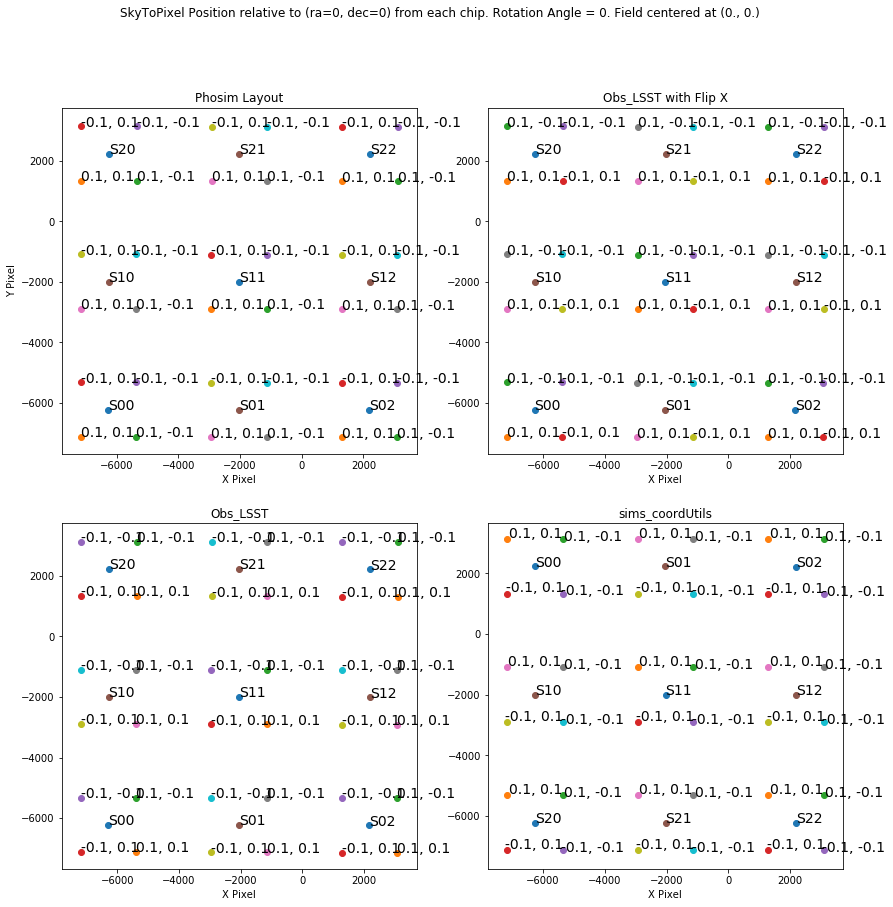

In [16]:
fig = plt.figure(figsize=(14, 14))
fig.add_subplot(2,2,1)
i = 0
for sensor_name in sensor_list:
    sensor_set = False
    sensor_loc = loc_map[sensor_name]
    #ax = plt.gca()
    #rect = Rectangle(sensor_loc, 1, 1, facecolor=ccd_plot_colors[i])
    #ax.add_patch(rect)
    for ra, dec, xpix, ypix in zip(phosim_wcs.query('sensor == "%s"' % sensor_name).ra.values,
                                   phosim_wcs.query('sensor == "%s"' % sensor_name).dec.values,
                                   phosim_wcs.query('sensor == "%s"' % sensor_name).xpix.values,
                                   phosim_wcs.query('sensor == "%s"' % sensor_name).ypix.values):
        if sensor_set is False:
            sensor_string = '%s' % (sensor_name)
            sensor_set = True
        else:
            sensor_string = '%.1f, %.1f' % (ra, dec)
        plt.scatter(-xpix, -ypix)#, 'Phosim -- %s' % sensor_name, fontsize=14)
        plt.text(-xpix, -ypix, sensor_string, fontsize=14)
    i += 1
plt.title('Phosim Layout')
plt.xlabel('X Pixel')
plt.ylabel('Y Pixel')
    
fig.add_subplot(2,2,2)
i = 0
for sensor_name in sensor_list:
    sensor_set = False
    sensor_loc = loc_map[sensor_name]
    #ax = plt.gca()
    #rect = Rectangle(sensor_loc, 1, 1, facecolor=ccd_plot_colors[i])
    #ax.add_patch(rect)
    for ra, dec, xpix, ypix in zip(obs_lsst_x.query('sensor == "%s"' % sensor_name).ra.values,
                                   obs_lsst_x.query('sensor == "%s"' % sensor_name).dec.values,
                                   obs_lsst_x.query('sensor == "%s"' % sensor_name).xpix.values,
                                   obs_lsst_x.query('sensor == "%s"' % sensor_name).ypix.values):
        if sensor_set is False:
            sensor_string = '%s' % (sensor_name)
            sensor_set = True
        else:
            sensor_string = '%.1f, %.1f' % (ra, dec)
        plt.scatter(-xpix, -ypix)#, 'Phosim -- %s' % sensor_name, fontsize=14)
        plt.text(-xpix, -ypix, sensor_string, fontsize=14)
    i += 1
plt.title('Obs_LSST with Flip X')
plt.xlabel('X Pixel')

fig.add_subplot(2,2,3)
i = 0
for sensor_name in sensor_list:
    sensor_set = False
    sensor_loc = loc_map[sensor_name]
    #ax = plt.gca()
    #rect = Rectangle(sensor_loc, 1, 1, facecolor=ccd_plot_colors[i])
    #ax.add_patch(rect)
    for ra, dec, xpix, ypix in zip(obs_lsst_no_x.query('sensor == "%s"' % sensor_name).ra.values,
                                   obs_lsst_no_x.query('sensor == "%s"' % sensor_name).dec.values,
                                   obs_lsst_no_x.query('sensor == "%s"' % sensor_name).xpix.values,
                                   obs_lsst_no_x.query('sensor == "%s"' % sensor_name).ypix.values):
        if sensor_set is False:
            sensor_string = '%s' % (sensor_name)
            sensor_set = True
        else:
            sensor_string = '%.1f, %.1f' % (ra, dec)
        plt.scatter(-xpix, -ypix)#, 'Phosim -- %s' % sensor_name, fontsize=14)
        plt.text(-xpix, -ypix, sensor_string, fontsize=14)
    i += 1
plt.title('Obs_LSST')
plt.xlabel('X Pixel')

fig.add_subplot(2,2,4)
i = 0
for sensor_name in sensor_list:
    sensor_set = False
    sensor_loc = loc_map[sensor_name]
    #ax = plt.gca()
    #rect = Rectangle(sensor_loc, 1, 1, facecolor=ccd_plot_colors[i])
    #ax.add_patch(rect)
    for ra, dec, xpix, ypix in zip(sims_coordUtils.query('sensor == "%s"' % sensor_name).ra.values,
                                   sims_coordUtils.query('sensor == "%s"' % sensor_name).dec.values,
                                   sims_coordUtils.query('sensor == "%s"' % sensor_name).xpix.values,
                                   sims_coordUtils.query('sensor == "%s"' % sensor_name).ypix.values):
        if sensor_set is False:
            sensor_string = '%s' % (sensor_name)
            sensor_set = True
        else:
            sensor_string = '%.1f, %.1f' % (ra, dec)
        plt.scatter(-xpix, -ypix)#, 'Phosim -- %s' % sensor_name, fontsize=14)
        #plt.text(-xpix+(1000*ra), -ypix+(1000*dec), sensor_string, fontsize=14)
        plt.text(-xpix+(1000*ra), -ypix+(1000*dec), sensor_string, fontsize=14)
    i += 1
plt.title('sims_coordUtils')
plt.xlabel('X Pixel')
# plt.xlim(0,3)
# plt.ylim(0,3)
plt.suptitle('SkyToPixel Position relative to (ra=0, dec=0) from each chip. Rotation Angle = 0. Field centered at (0., 0.)')